🤗 Fine-tune pyannote's segmentation model for multilingual speaker diarization

In this colab, i present a step-by-step guide on how to fine-tune a speaker segmentation model from pyannote on multilingual speaker diarization datasets using diarizers, a library compatible with the Hugging Face 🤗 ecosystem, and use it back in a speaker diarization pipeline.


In [ ]:
!pip install pyannote.audio

To load pre-trained diarization models from the Hub, you'll first need to accept the terms-of-use for the following two models:

    pyannote/segmentation-3.0
    pyannote/speaker-diarization-3.1

To load the CallHome dataset from the Hub, you'll also need to accept its terms of use:

    diarizers-community/callhome

You'll then need to enter your Hub authentication token. Find your Hub authentication token here.


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
import gdown

## below code is used to download the data audio and their annotation files from the google drive on colab

In [ ]:
folder_url="https://drive.google.com/drive/folders/1zv7KfpeE4Ozfe5esHIcN4XekvbdLd974"
gdown.download_folder(folder_url, quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1UmDXPI9QpNeB2-UkRr0Buy_90zQSz_Ji 1-WS550031.txt
Processing file 1XeUKzLy0ntlI6L5UJwuMuLBJAo9sTabM 2-WS550069.txt
Processing file 1_9RLIMPCAw_n0dHwcvfQr-ScnN5D9w3u 3-WS320115.txt
Processing file 1gDi9tu5GjDpTew3_dKnLywf90Up3F15H 4-WS550024.txt
Processing file 172fo9M5qO-v95uLaTO6MkYESMTd8E-xu 5-WS550054.txt
Processing file 10VuXuqlPse3pxeaaQBGaBcic2Yunq93s 7-WS550037.txt
Processing file 1YTicXoXA_WPClRk_Klh1BrxFvUmBK0WU 8-WS550018.txt
Processing file 1kYrG5WoYCLdQmID_ra3vPRpO85F1caGU 9-WS550009.txt
Processing file 1fkL-UIEmv3wOdrGQA2saiqWgZUfD5ilK 10-WS550062.txt
Processing file 13Rb_ZgxCaUsaFZYt8qR2KozE7wip87BC 12-WS750027.txt
Processing file 1IRFrhtQ91tsWiVRRFOkttwQ7jXBfUGn5 13-WS550080.txt
Processing file 1HTCIRBDXRJgEowH3FmMG6MHKWW1aQOae 14-WS550050.txt
Processing file 1QlZ13HAGFdWcewqmmy_aDkj9d8tJR6Aq 15-WS550046.txt
Processing file 1i0PyUZ5Cmd4p9vHCFGu21J3oXUVVfQ1J 18-WS550064.txt
Processing file 1YgvjHMlhdVfjSD8lpRBjhA2_XfUQy_xJ 20-WS550068.txt
Processing file 1y

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1UmDXPI9QpNeB2-UkRr0Buy_90zQSz_Ji
To: /content/BECCI_33recordings_annotations/1-WS550031.txt
100%|██████████| 11.6k/11.6k [00:00<00:00, 27.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XeUKzLy0ntlI6L5UJwuMuLBJAo9sTabM
To: /content/BECCI_33recordings_annotations/2-WS550069.txt
100%|██████████| 7.18k/7.18k [00:00<00:00, 9.02MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_9RLIMPCAw_n0dHwcvfQr-ScnN5D9w3u
To: /content/BECCI_33recordings_annotations/3-WS320115.txt
100%|██████████| 24.4k/24.4k [00:00<00:00, 36.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gDi9tu5GjDpTew3_dKnLywf90Up3F15H
To: /content/BECCI_33recordings_annotations/4-WS550024.txt
100%|██████████| 34.5k/34.5k [00:00<00:00, 49.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=172fo9M5qO-v95uLaTO6MkYESMTd8E-xu
To: /content/BECC

['/content/BECCI_33recordings_annotations/1-WS550031.txt',
 '/content/BECCI_33recordings_annotations/2-WS550069.txt',
 '/content/BECCI_33recordings_annotations/3-WS320115.txt',
 '/content/BECCI_33recordings_annotations/4-WS550024.txt',
 '/content/BECCI_33recordings_annotations/5-WS550054.txt',
 '/content/BECCI_33recordings_annotations/7-WS550037.txt',
 '/content/BECCI_33recordings_annotations/8-WS550018.txt',
 '/content/BECCI_33recordings_annotations/9-WS550009.txt',
 '/content/BECCI_33recordings_annotations/10-WS550062.txt',
 '/content/BECCI_33recordings_annotations/12-WS750027.txt',
 '/content/BECCI_33recordings_annotations/13-WS550080.txt',
 '/content/BECCI_33recordings_annotations/14-WS550050.txt',
 '/content/BECCI_33recordings_annotations/15-WS550046.txt',
 '/content/BECCI_33recordings_annotations/18-WS550064.txt',
 '/content/BECCI_33recordings_annotations/20-WS550068.txt',
 '/content/BECCI_33recordings_annotations/21-WS550020.txt',
 '/content/BECCI_33recordings_annotations/22-WS3

In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
import os
# Replace 'YOUR_FOLDER_ID' with your Google Drive folder ID
folder_id = '1JjJ6xNm4D0v-uJuYiYTi3MScBTFWs7TL'

# Define the local download path
local_download_path = '/content/audio'
os.makedirs(local_download_path, exist_ok=True)

# List files in the folder on Google Drive
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()

for file in file_list:
    file_id = file['id']
    file_name = file['title']
    print(f'Downloading: {file_name}')

    # Download each file to the local_download_path
    downloaded_file = drive.CreateFile({'id': file_id})
    downloaded_file.GetContentFile(os.path.join(local_download_path, file_name))
    print(f'Downloaded: {file_name} to {local_download_path}')


Downloading: 9-WS550009.wav
Downloaded: 9-WS550009.wav to /content/audio
Downloading: 8-WS550018.wav
Downloaded: 8-WS550018.wav to /content/audio
Downloading: 7-WS550037.wav
Downloaded: 7-WS550037.wav to /content/audio
Downloading: 6-WS550053.wav
Downloaded: 6-WS550053.wav to /content/audio
Downloading: 5-WS550054.wav
Downloaded: 5-WS550054.wav to /content/audio
Downloading: 4-WS550024.wav
Downloaded: 4-WS550024.wav to /content/audio
Downloading: 3-WS320115.wav
Downloaded: 3-WS320115.wav to /content/audio
Downloading: 33-WS320034.wav
Downloaded: 33-WS320034.wav to /content/audio
Downloading: 32-WS750023.wav
Downloaded: 32-WS750023.wav to /content/audio
Downloading: 31-WS550021.wav
Downloaded: 31-WS550021.wav to /content/audio
Downloading: 30-WS550052.wav
Downloaded: 30-WS550052.wav to /content/audio
Downloading: 2-WS550069.wav
Downloaded: 2-WS550069.wav to /content/audio
Downloading: 29-WS550029.wav
Downloaded: 29-WS550029.wav to /content/audio
Downloading: 28-WS550083.wav
Downloaded: 



This diarizers library includes dependencies to transformers, datasets, accelerate, pyannote.audio and torch. We will need all these dependencies to run this notebook.

To install them all, simply run the following line of code, which will install the diarizers package:


In [ ]:
!pip install --upgrade --quiet git+https://github.com/huggingface/diarizers.git

In [ ]:
pip install datasets

In [ ]:
import os
import librosa
from datasets import Dataset, DatasetDict, Audio

to train the model for speaker diarization purposes first i have to convert the our data into the a format in which pyannote take input.below code is converting our data into that format.

In [ ]:
import os
import librosa
import soundfile as sf
from datasets import Dataset, DatasetDict, Audio

# Paths to your data
audio_dir = '/content/audio'  # Folder containing audio files
annotations_dir = '/content/annotations'  # Folder containing annotation files

# Function to convert audio sampling rate to 16 kHz
def convert_audio_sampling_rate(audio_path, target_sr=16000):
    audio, sr = librosa.load(audio_path, sr=None)  # Load with original sampling rate
    if sr != target_sr:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)  # Resample to target sampling rate
        sf.write(audio_path, audio, target_sr)  # Save the resampled audio back to the file

# Convert all audio files to 16 kHz
for audio_file in os.listdir(audio_dir):
    if audio_file.endswith(".wav"):
        convert_audio_sampling_rate(os.path.join(audio_dir, audio_file))

# Initialize lists to store data
audio_paths = []
timestamps_start = []
timestamps_end = []
speakers = []

# Iterate over each annotation file
for annotation_file in os.listdir(annotations_dir):
    if annotation_file.endswith(".txt"):
        # Load corresponding audio file
        audio_filename = os.path.splitext(annotation_file)[0] + ".wav"
        audio_path = os.path.join(audio_dir, audio_filename)

        # Initialize lists for this audio file
        start_times = []
        end_times = []
        speaker_labels = []

        # Load the annotation file with specified encoding
        with open(os.path.join(annotations_dir, annotation_file), 'r', encoding='utf-8', errors='ignore') as f:
            for line in f:
                # Replace multiple spaces or tabs with a single tab
                line = line.replace('   ', '\t').replace('  ', '\t').replace(' ', '\t').strip()
                parts = line.split('\t')

                # Filter out empty strings and normalize parts to have exactly three items
                parts = list(filter(None, parts))

                if len(parts) < 3:
                    print(f"Skipping malformed line in {annotation_file}: {line}")
                    continue  # Skip malformed lines

                try:
                    start = float(parts[0])
                    end = float(parts[1])
                    speaker = parts[2]
                    start_times.append(start)
                    end_times.append(end)
                    speaker_labels.append(speaker)
                except ValueError as e:
                    print(f"Skipping line due to error in {annotation_file}: {line} with error {e}")
                    continue

        # Append aggregated data for this audio file
        audio_paths.append(audio_path)
        timestamps_start.append(start_times)
        timestamps_end.append(end_times)
        speakers.append(speaker_labels)

# Create a dictionary with the aggregated data
data_dict = {
    'audio': audio_paths,
    'timestamps_start': timestamps_start,
    'timestamps_end': timestamps_end,
    'speakers': speakers
}

# Load into a Dataset
dataset = Dataset.from_dict(data_dict)

# Convert 'audio' column to Audio format
dataset = dataset.cast_column("audio", Audio())

# Create DatasetDict
dataset_dict = DatasetDict({
    "data": dataset
})

# Save the dataset
dataset_dict.save_to_disk('/content/data12')


Saving the dataset (0/1 shards):   0%|          | 0/7 [00:00<?, ? examples/s]

Load a dataset:

Using 🤗 Datasets, loading and preparing speaker diarization datasets is extremely simple.here i am loading the data from my local disk.

In [ ]:
from datasets import load_from_disk

# Load the dataset
loaded_dataset = load_from_disk('/content/data12')
print(loaded_dataset)


DatasetDict({
    data: Dataset({
        features: ['audio', 'timestamps_start', 'timestamps_end', 'speakers'],
        num_rows: 7
    })
})


Let's inspect the dataset we've loaded:

In [ ]:
print(loaded_dataset["data"][0])


{'audio': {'path': '8-WS550018.wav', 'array': array([ 0.        ,  0.        ,  0.        , ..., -0.01577759,
       -0.02410889, -0.02520752]), 'sampling_rate': 16000}, 'timestamps_start': [0.0, 3.20571, 6.63967, 8.44319, 9.37467, 10.86605, 12.2286, 15.35998, 15.82077, 16.24638, 16.51889, 16.93509, 17.11033, 17.35441, 26.90436, 27.2883, 28.84024, 29.60468, 30.93416, 31.5894, 31.76983, 32.50104, 33.82814, 34.45726, 37.39363, 38.96526, 42.91614, 43.48931, 44.40807, 45.01583, 45.89898, 46.42602, 47.14536, 48.08074, 51.15071, 51.54718, 53.09964, 53.34179, 54.2012, 58.07329, 58.67868, 59.59031, 60.15059, 60.75598, 61.56791, 65.51597, 65.98189, 69.01119, 69.6783, 72.8263, 74.07506, 74.8502, 75.32976, 76.14406, 76.79455, 77.21476, 77.90264, 78.73831, 79.50276, 80.8536, 81.93617, 84.0111, 84.90647, 86.38789, 86.77248, 87.11435, 88.61228, 89.29601, 90.79167, 92.67467, 93.12337, 95.81052, 96.25209, 96.83542, 98.29547, 98.77977, 100.2032, 100.59176, 101.70282, 102.14221, 102.50463, 105.76536, 10

As we can see, this dataset contains four features:

    audio: Audio feature with audios samples at 16kHz.
    speakers: The list of audio speakers, with their order of appearance.
    timestamps_start: A list of timestamps indicating the start of each speaker segment.
    timestamps_end: A list of timestamps indicating the end of each speaker segment.

These are the features we want to have in our speaker diarisation dataset to make it compatible with diarizers. As for the callhome dataset, all the other speaker diarization datasets present in diarizers-community come with these features.

In [ ]:
from IPython.display import Audio, display
example = loaded_dataset["data"][0]

In [ ]:
print(display(Audio(example['audio']['array'], rate=example['audio']['sampling_rate'])))
print('Speakers: ', example['speakers'])
print('timestamps_start: ', example['timestamps_start'])
print('timestamps_end: ', example['timestamps_end'])

Our dataset doesn't come with a predefined train-val-test split. Here, we use the train_test_split method from 🤗 Datasets to split it with 80-10-10 proportion:

In [ ]:
from datasets import DatasetDict

train_testvalid = loaded_dataset['data'].train_test_split(test_size=0.2, seed=0)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5, seed=0)

dataset = DatasetDict({
    'train': train_testvalid['train'],
     'validation': test_valid['test'],
     'test': test_valid['train']
 })

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['audio', 'timestamps_start', 'timestamps_end', 'speakers'],
        num_rows: 5
    })
    validation: Dataset({
        features: ['audio', 'timestamps_start', 'timestamps_end', 'speakers'],
        num_rows: 1
    })
    test: Dataset({
        features: ['audio', 'timestamps_start', 'timestamps_end', 'speakers'],
        num_rows: 1
    })
})

##Load the pretrained model

Let's load the pretrained segmentation-model model we want to fine-tune. We can load the pre-trained weights from the Hugging Face Hub using the .from_pretrained method. We will use its configuration to know how we should preprocess our dataset.


In [ ]:
from pyannote.audio import Model

In [ ]:
pretrained = Model.from_pretrained(
  "pyannote/segmentation-3.0",
  use_auth_token=True
)



To fine-tune the pretrained segmentation model with the Hugging Face Trainer, we need to export it to the diarizers modelling class SegmentationModel. This class is a convenient wrapper around the pyannote segmentation model that enables compatibility with the Trainer by ensuring the correct input arguments and returning the expected output format.

We can load pyannote's pretrained model weights, architecture and configuration into a SegmentationModel using the next line of code:


In [ ]:
from diarizers import SegmentationModel

model = SegmentationModel.from_pyannote_model(pretrained)

Let's visualise the configuration used by the pretrained model:

In [ ]:
model.config

SegmentationModelConfig {
  "chunk_duration": 10.0,
  "max_speakers_per_chunk": 3,
  "max_speakers_per_frame": 2,
  "min_duration": null,
  "model_type": "pyannet",
  "sample_rate": 16000,
  "transformers_version": "4.42.4",
  "warm_up": [
    0.0,
    0.0
  ],
  "weigh_by_cardinality": false
}

Preprocess the dataset

Now that we have the dataset and the pre-trained model we want to fine-tune our model on, we can pre-process the dataset to make it ready for training.

For this, we use the Preprocess class from diarizers. We can instantiate a preprocessor by passing the model's config as input to Preprocess. The preprocessing is done so that:

    the input to the models are audio chunks of length chunk_duration.
    The segmentation labels to predict contain maximum max_speakers_per_chunk and max_speakers_per_frame speakers.



In [ ]:
from diarizers import Preprocess
preprocessor = Preprocess(model.config)



We can now pre-process the train and val splits of the dataset using the .map function from 🤗 Datasets.

We can also specify whether we want to add overlap between successive audio chunks in each dataset. Here we will add 50% overlap (0.5) between successive examples in the train set and no overlap (0) in the val set:


In [ ]:
train_set = dataset['train'].map(
    lambda file: preprocessor(file, random=False, overlap=0.5),
    num_proc=2,
    remove_columns=next(iter(dataset.values())).column_names,
    batched=True,
    batch_size=1
).with_format("torch")

val_set = dataset['validation'].map(
    lambda file: preprocessor(file, random=False, overlap=0.0),
    num_proc=2,
    remove_columns=next(iter(dataset.values())).column_names,
    batched=True,
    batch_size=1
).with_format('torch')

Map (num_proc=2):   0%|          | 0/5 [00:00<?, ? examples/s]

num_proc must be <= 1. Reducing num_proc to 1 for dataset of size 1.


Map:   0%|          | 0/1 [00:00<?, ? examples/s]



The processed dataset contains 3 features:

    waveforms: The input to the model - a tensor array containing 10s audio chunk, sampled at 16000 Hz.
    labels: The target output of the model - a tensor with shape (num_frames,num_speakers)
    nb_speakers: The speakers in the current chunk - a tensor with shape (0, nb_speakers).

Let's listen to an example and visualize the corresponding labels:


In [ ]:
from IPython.display import Audio, display

example2 = train_set[5]

display(Audio(example2['waveforms'], rate = 16000))

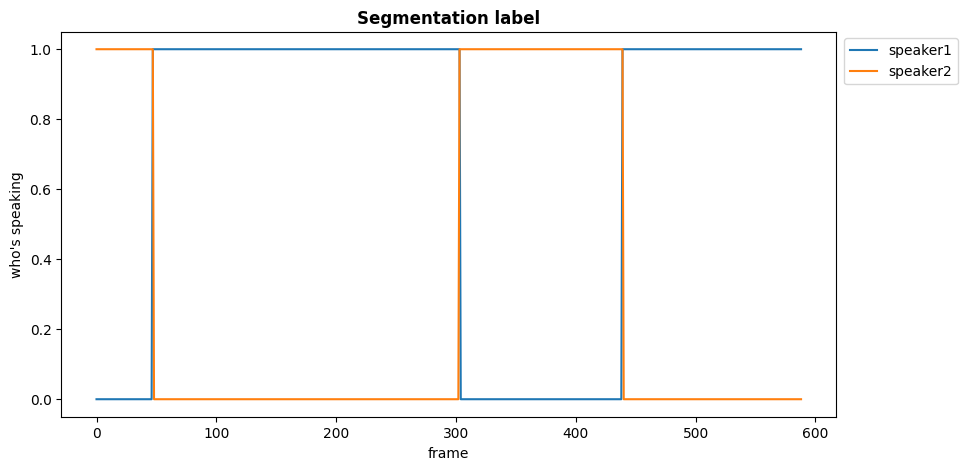

In [ ]:
import matplotlib.pyplot as plt

def plot_segmentation_labels(example):

  plt.figure(figsize = (10, 5))
  plt.plot(example2['labels'][:,0], label= 'speaker1')
  plt.plot(example2['labels'][:,1], label='speaker2')
  plt.legend(bbox_to_anchor=(1.001, 1.001))
  plt.xlabel('frame')
  plt.ylabel("who's speaking")
  plt.title('Segmentation label', fontweight="bold")
  plt.show()

plot_segmentation_labels(example2)

Prepare Training

Once we have preprocessed the dataset, we can start preparing the training! this will include loading the proper DataCollator, metrics and TrainingArguments:


Load the DataCollator

diarizers comes with a custom DataCollator adapted to the training of the segmentation model.

After preprocessing, each audio-chunk can have a different numbers of speakers: as a consequence, the segmentation labels won't have the same shapes (num_frames, num_speakers).

The DataCollator solves this issue by dynamically padding all target tensors to max_speakers_per_chunk during training. It can be loaded with the following line of code:


In [ ]:
from diarizers import DataCollator

data_collator = DataCollator(max_speakers_per_chunk=model.config.max_speakers_per_chunk)

Load the evaluation metrics

Next, we define the metrics used to evaluate the model during training: we will use the diarisation-error-rate (DER), which is the de-facto metric for evaluating speaker diarisation systems.

We'll also compute the missed detection, false alarm and confusion rates, which are inherently used to calculate the DER. More information on speaker diarisation metrics can be found in the pyannote documentation doc.

With diarizers, we can compute these metrics using the Metrics class:


In [ ]:
from diarizers import Metrics

metrics = Metrics(model.specifications)
metrics.metrics

{'der': DiarizationErrorRate(),
 'confusion': SpeakerConfusionRate(),
 'missed_detection': MissedDetectionRate(),
 'false_alarm': FalseAlarmRate()}

Define the training arguments

In the final step before launching training, we define the TrainingArguments. Here, we will train the model for 5 epochs and a learning rate of 1e-3. We can play with these hyperparameters to improve the performances of the segmentation model.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./speaker-segmentation-fine-tuned-callhome-jpn',
    save_strategy="epoch",
    learning_rate=1e-3,
    num_train_epochs=25,
    lr_scheduler_type="cosine",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    gradient_accumulation_steps=1,
    dataloader_num_workers=2,
    logging_steps=25,
    load_best_model_at_end=True,
    seed=42,
    push_to_hub=False,
)



Note: if one does not want to upload the model checkpoints to the Hub, set push_to_hub=False.

We can forward the training arguments to the 🤗 Trainer along with our model, dataset, data collator and metrics function:


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_set,
    data_collator=data_collator,
    eval_dataset=val_set,
    compute_metrics=metrics,
)

Train

We can now launch training!

In [ ]:
first_eval = trainer.evaluate()
first_eval

{'eval_loss': 1.6075913906097412,
 'eval_der': 0.39605164527893066,
 'eval_false_alarm': 0.04451531171798706,
 'eval_missed_detection': 0.22130092978477478,
 'eval_confusion': 0.13023538887500763,
 'eval_runtime': 3.5654,
 'eval_samples_per_second': 47.681,
 'eval_steps_per_second': 1.683}

To launch training, simply execute:


In [ ]:
trainer.train()

Could not estimate the number of tokens of the input, floating-point operations will not be computed


Epoch,Training Loss,Validation Loss,Der,False Alarm,Missed Detection,Confusion
1,0.935600,0.936853,0.306738,0.022526,0.009355,0.274857
2,0.596600,0.869837,0.288190,0.022344,0.009010,0.256836
3,0.536800,0.868457,0.278836,0.022526,0.008818,0.247492
4,0.489800,0.845157,0.266829,0.022526,0.008808,0.235495
5,0.481400,0.844850,0.265330,0.022526,0.008828,0.233976
6,0.472300,0.878623,0.268884,0.022526,0.008808,0.237550
7,0.459000,0.867987,0.266191,0.022526,0.008818,0.234847
8,0.471800,0.868346,0.266069,0.022526,0.008808,0.234736


TrainOutput(global_step=368, training_loss=0.5427114211994669, metrics={'train_runtime': 189.8876, 'train_samples_per_second': 61.889, 'train_steps_per_second': 1.938, 'total_flos': 0.0, 'train_loss': 0.5427114211994669, 'epoch': 8.0})



Our best DER is 25% - not bad for 5min training! We also see that the false alarm, missed detection and confusion metrics also decrease substantially.

We can make our model more accessible on the Hub with appropriate tags and README information. You can change these values to match your dataset, language and model name accordingly:


In [ ]:
kwargs = {
    "dataset_tags":'diarizers-community/callhome',
    "dataset_args": "config: jpn",
    "language": "jpn",
    "model_name": "speaker-segmentation-fine-tuned-callhome-jpn",
    "finetuned_from": "pyannote/speaker-diarization-3.1",
    "tasks": "speaker-diarization",
    "tags": ['speaker-diarization', 'speaker-segmentation']
}

The training results can now be uploaded to the Hub. In doing so, the fine-tuned model can easily be loaded by any member of the community. To do so, execute the push_to_hub command from the trainer:

In [ ]:
trainer.push_to_hub(**kwargs)

events.out.tfevents.1724740108.3bc17f263cb5.5776.2:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jamil117/speaker-segmentation-fine-tuned-callhome-jpn/commit/0f7b94ef39a4cd50d6d2de503cd1ee6e49e378c3', commit_message='End of training', commit_description='', oid='0f7b94ef39a4cd50d6d2de503cd1ee6e49e378c3', pr_url=None, pr_revision=None, pr_num=None)

Test at inference time

Now that we have our fine-tuned segmentation model, we can convert it to a pyannote format using the following line of code:


In [ ]:
model = model.to_pyannote_model()



...and evaluate the model at inference time, on full meeting recordings!

For that, we can use the Test class from diarizers. Let's instanciate an object from this class: we'll need to specify the dataset we want to evaluate our model on (here the test set of callhome japanese), the segmentation model, as well as the step (in seconds) between successive on-the-fly generated audio chunks:


In [ ]:
from diarizers import Test
test = Test(dataset['test'], model, step=2.5)

In [ ]:
metrics = test.compute_metrics()
metrics

Use in a pyannote speaker diarization pipeline

Finally, we can load the segmentation model into a pyannote speaker diarization pipeline:

To do so, we load the pre-trained diarization pipeline, and subsequently override the segmentation model with our fine-tuned checkpoint:


In [ ]:
import torch
from pyannote.audio import Pipeline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1")
pipeline.to(device)
pipeline._segmentation.model = model.to(device)

We can then run the speaker diarization pipeline on a full meeting example: we load an example from the test set, and preprocess it to be given as input to the diarization pipeline:

In [ ]:
example = dataset['test'][0]

print("Number of speaker talking in file: ", len(set(example['speakers'])))

sample = {}
sample["waveform"] = torch.from_numpy(example['audio']["array"]).to(device, dtype=model.dtype).unsqueeze(0)
sample["sample_rate"] = example['audio']['sampling_rate']

# perform inference
diarization = pipeline(sample, num_speakers=5)

Number of speaker talking in file:  4


In [ ]:
print(speakers)

[['noise', 'speechCLI', 'noise', 'noise', 'speechCLI', 'noise', 'speechCLI', 'speechOVE', 'speechCLI', 'speechOVE', 'speechCLI', 'speechPAT', 'speechOVE', 'speechPAT', 'speechOVE', 'speechPAT', 'noise', 'speechPAT', 'speechOVE', 'speechCLI', 'speechOVE', 'speechPAT', 'noise', 'speechPAT', 'speechCLI', 'speechPAT', 'noise', 'speechPAT', 'noise', 'speechPAT', 'speechOVE', 'speechCLI', 'speechOVE', 'speechPAT', 'speechOVE', 'speechCLI', 'speechPAT', 'speechCLI', 'speechPAT', 'noise', 'speechPAT', 'speechOVE', 'speechPAT', 'noise', 'speechPAT', 'noise', 'speechPAT', 'speechCLI', 'speechPAT', 'noise', 'speechPAT', 'speechCLI', 'speechPAT', 'speechOVE', 'speechCLI', 'noise', 'speechPAT', 'speechCLI', 'speechPAT', 'noise', 'speechPAT', 'noise', 'speechPAT', 'speechCLI', 'speechOVE', 'speechPAT', 'speechCLI', 'speechOVE', 'speechCLI', 'speechOVE', 'speechPAT', 'speechCLI', 'speechOVE', 'speechPAT', 'speechOVE', 'speechPAT', 'speechCLI', 'speechPAT', 'speechCLI', 'speechOVE', 'speechPAT', 'nois

We can now visualize the diarization results:

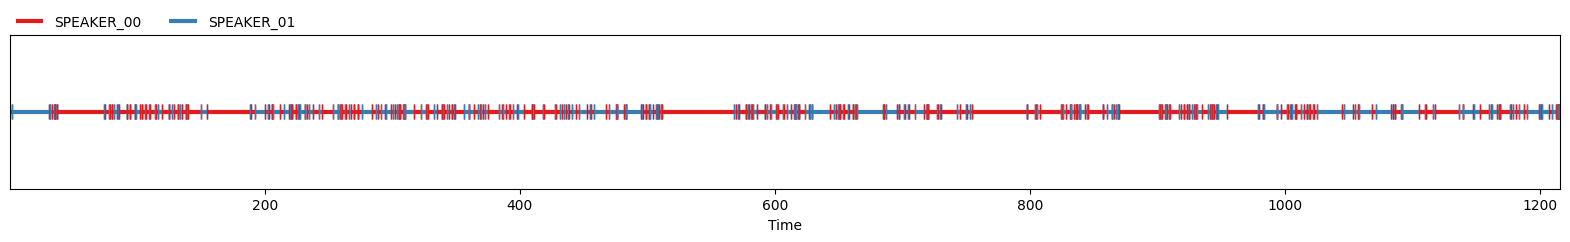

In [ ]:
diarization

..and save them in rttm format:


In [ ]:
with open("audio.rttm", "w") as rttm:
    diarization.write_rttm(rttm)